<a href="https://colab.research.google.com/github/Pickase/Bike-Rental/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Csv/day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.shape

(731, 16)

### **Observation**:
The datatset contains per day bike rentall counts with 721 entires and 16 attibutes, out of which 12 variables and 1 depedent variable forms parts of regression analysis.

In [5]:
#Checking the data tyoes available in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#Displaying the basic statistics of the numerical values
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
#Converting normalized tempratire to regular temprature
ntemp=(df['temp']*47)-8
#Converting normalized feel temprature to regular feel temprature
nftemp=(df['atemp']*47)-8

In [8]:
#Adding regular temprature to dataframe
df['ntemp']=ntemp
df['nftemp']=nftemp

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ntemp,nftemp
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849,9.090375
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466,8.625733
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108,0.902035
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000,1.969734
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979,2.775690


**De-normalising Hunididty and Windspeed values**
- hum:Normalized humidity. The vaues are divided to 100(max)
- windspeed:  Normalized wind speed. The values are divided to 67(max)

In [10]:
nhum=df['hum']*100
hwind=df['windspeed']*67

In [11]:
df['nhum']=nhum
df['nwind']=hwind

## Feature Engineering
Checking for Correlation using Heatmap.

# Data Preprocessing

Checking for missing values.

In [12]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
ntemp         0
nftemp        0
nhum          0
nwind         0
dtype: int64

In [13]:
df.drop(columns=['temp','atemp','hum','windspeed','casual','registered','instant','dteday'],inplace=True)

### Outlier Treatment

In [14]:
#Handling Outliers using 5th and 95th percentile.
for column in df[['nhum','nwind']]:
  df[column]=np.where(df[column]<df[column].quantile(0.05),df[column].quantile(0.05),df[column])
  df[column]=np.where(df[column]>df[column].quantile(0.95),df[column].quantile(0.95),df[column])

<Axes: >

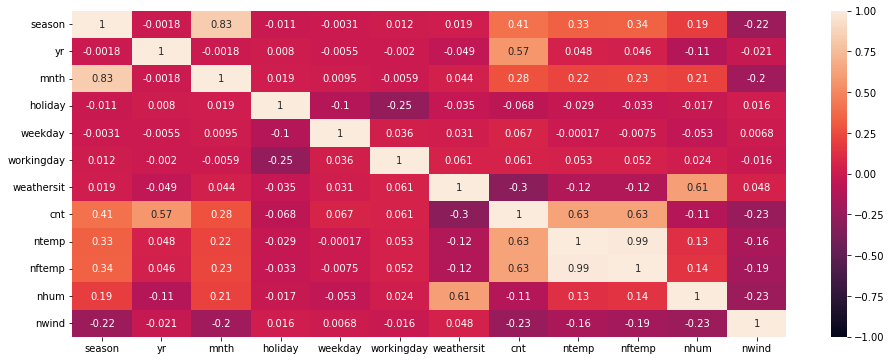

In [15]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

## Scaling the data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
std=StandardScaler()
scaled=std.fit_transform(df)
scaled

array([[-1.34821315, -1.00136893, -1.60016072, ..., -0.67994602,
         1.34192097, -0.40729299],
       [-1.34821315, -1.00136893, -1.60016072, ..., -0.74065231,
         0.50882269,  0.82289734],
       [-1.34821315, -1.00136893, -1.60016072, ..., -1.749767  ,
        -1.45587303,  0.81968546],
       ...,
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.42434419,
         0.94022771, -0.91090115],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.49004895,
        -1.10622469,  2.14596673],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.54048197,
        -0.39138893, -0.48549518]])

In [20]:
scaled_df=pd.DataFrame(data=scaled,columns=df.columns)
scaled_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,ntemp,nftemp,nhum,nwind
0,-1.348213,-1.001369,-1.600161,-0.171981,1.498809,-1.471225,1.110427,-1.817953,-0.826662,-0.679946,1.341921,-0.407293
1,-1.348213,-1.001369,-1.600161,-0.171981,-1.496077,-1.471225,1.110427,-1.912999,-0.721095,-0.740652,0.508823,0.822897
2,-1.348213,-1.001369,-1.600161,-0.171981,-0.996930,0.679706,-0.726048,-1.629925,-1.634657,-1.749767,-1.455873,0.819685
3,-1.348213,-1.001369,-1.600161,-0.171981,-0.497782,0.679706,-0.726048,-1.519898,-1.614780,-1.610270,-0.293197,-0.409388
4,-1.348213,-1.001369,-1.600161,-0.171981,0.001366,0.679706,-0.726048,-1.500269,-1.467414,-1.504971,-1.458272,-0.037871


Splitting the data into training and test sets

In [22]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [26]:
X=scaled_df.drop('cnt',axis=1)
y=scaled_df['cnt']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=35)

## Model Building

### Linear Regression Model

In [30]:
LR=LinearRegression()
LR.fit(X_train,y_train)
ypred=LR.predict(X_test)
ypredtr=LR.predict(X_train)

In [32]:
accuracy=cross_val_score(estimator=LR,X=X_train,y=y_train,cv=10)
accuracy.mean()

0.7517917023628363

In [36]:
LRtest=r2_score(y_test,ypred)
LRtrain=r2_score(y_train,ypredtr)
print(LRtest,LRtrain)

0.8363101691275573 0.7797881606871914


In [40]:
adjusted_r2=1-(((1-LRtest)*(220-1))/(220-11-1))
adjusted_r2

0.8276534953794954